
## 📌 Covariance vs Correlation 

---

### ✅ **Covariance**

* **Measures**: How two variables **move together**.
* **Positive** → both increase
* **Negative** → one increases, the other decreases
* **Zero** → no linear relationship
* **Not standardized** → depends on data scale/units

#### 🔹 Formula:

$$
\text{Cov}(X, Y) = \frac{1}{n} \sum (X_i - \bar{X})(Y_i - \bar{Y})
$$

#### 🔹 Example:

```python
X = [1, 2, 3]
Y = [2, 4, 6]  → Cov > 0
```

---

### ✅ **Correlation**

* **Measures**: **Strength & direction** of the relationship
* **Range**: -1 to +1

  * `+1` = perfect positive
  * `0` = no linear relationship
  * `-1` = perfect negative
* **Standardized** → unitless

#### 🔹 Formula:

$$
\text{Corr}(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y}
$$

#### 🔹 Example:

```python
X = [1, 2, 3]
Y = [10, 20, 30] → Corr = 1.0
```

---



### 📊 **Summary Table – Variance, Standard Deviation, Covariance, Correlation**

| Concept                | Population Formula                                               | Sample Formula                                                           |
| ---------------------- | ---------------------------------------------------------------- | ------------------------------------------------------------------------ |
| **Variance**           | $\sigma^2 = \frac{1}{N} \sum (x_i - \mu)^2$                      | $s^2 = \frac{1}{n - 1} \sum (x_i - \bar{x})^2$                           |
| **Standard Deviation** | $\sigma = \sqrt{ \frac{1}{N} \sum (x_i - \mu)^2 }$               | $s = \sqrt{ \frac{1}{n - 1} \sum (x_i - \bar{x})^2 }$                    |
| **Covariance**         | $\text{Cov}(X, Y) = \frac{1}{N} \sum (x_i - \mu_X)(y_i - \mu_Y)$ | $\text{Cov}(X, Y) = \frac{1}{n - 1} \sum (x_i - \bar{x})(y_i - \bar{y})$ |
| **Correlation**        | $\rho = \frac{ \text{Cov}(X, Y) }{ \sigma_X \cdot \sigma_Y }$    | $r = \frac{ \text{Cov}(X, Y) }{ s_X \cdot s_Y }$                         |

---


In [5]:
#find Covariance code 
def covariance(x, y):
    """
    Calculate the covariance between two lists of numbers.
    
    Parameters:
    x (list): First list of numbers.
    y (list): Second list of numbers.
    
    Returns:
    float: Covariance between the two lists.
    """
    if len(x) != len(y):
        raise ValueError("Lists must be of the same length.")
    
    n = len(x)
    mean_x = sum(x) / n
    mean_y = sum(y) / n
    
    cov = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n)) / n
    return cov

In [6]:
#Code for correlation
def correlation(x, y):
    """
    Calculate the Pearson correlation coefficient between two lists of numbers.
    
    Parameters:
    x (list): First list of numbers.
    y (list): Second list of numbers.
    
    Returns:
    float: Pearson correlation coefficient between the two lists.
    """
    if len(x) != len(y):
        raise ValueError("Lists must be of the same length.")
    
    n = len(x)
    mean_x = sum(x) / n
    mean_y = sum(y) / n
    
    cov = covariance(x, y)
    std_x = (sum((xi - mean_x) ** 2 for xi in x) / n) ** 0.5
    std_y = (sum((yi - mean_y) ** 2 for yi in y) / n) ** 0.5
    
    if std_x == 0 or std_y == 0:
        raise ValueError("Standard deviation cannot be zero.")
    
    return cov / (std_x * std_y)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Covariance: 8.289388917629669
Correlation: 0.6757341092113643
   Covariance  Correlation
0    8.289389     0.675734


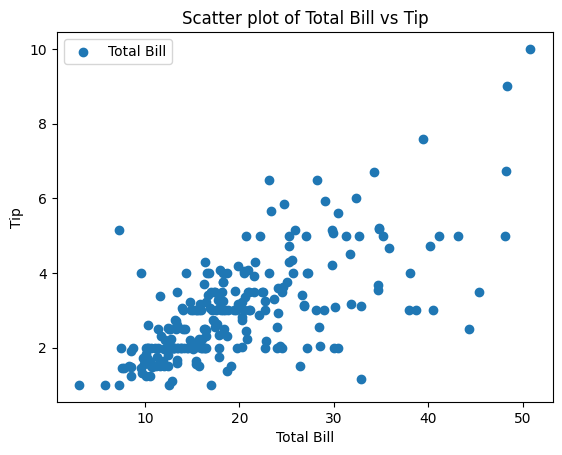

In [11]:
import seaborn as sns

# Load the tips dataset
Dataset_tips = sns.load_dataset('tips')
print(Dataset_tips.head(5))

# Extract the total bill and tip columns
total_bill = Dataset_tips['total_bill'].tolist()
tip = Dataset_tips['tip'].tolist()
# Calculate covariance and correlation
cov = covariance(total_bill, tip)
cor = correlation(total_bill, tip)
print(f"Covariance: {cov}")
print(f"Correlation: {cor}")
#make it table of covariance and correlation
import pandas as pd
data = {'Covariance': [cov], 'Correlation': [cor]}
df = pd.DataFrame(data)
print(df)
#make graph 
import matplotlib.pyplot as plt
plt.scatter(total_bill, tip)
plt.legend(['Total Bill', 'Tip'])
plt.title('Scatter plot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

                    Covariance  Correlation
Total Bill vs Tip     8.289389     0.675734
Size vs Tip           0.641267     0.489299
Total Bill vs Size    5.045221     0.598315


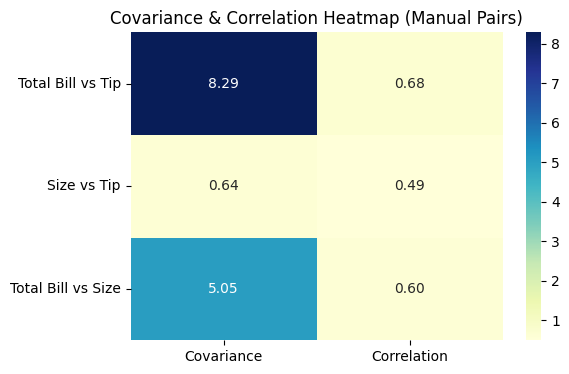

In [18]:
import seaborn as sns 
Dataset_tips=sns.load_dataset("tips")
cov_tips_and_total_bill=covariance(Dataset_tips["total_bill"],Dataset_tips["tip"])
cor_tips_and_total_bill=correlation(Dataset_tips["total_bill"],Dataset_tips["tip"])
cov_tips_and_size=covariance(Dataset_tips["size"],Dataset_tips["tip"])
cor_tips_and_size=correlation(Dataset_tips["size"],Dataset_tips["tip"])
cov_total_bill_and_size=covariance(Dataset_tips["total_bill"],Dataset_tips["size"])
cor_total_bill_and_size=correlation(Dataset_tips["total_bill"],Dataset_tips["size"])
#Create table of covariance and correlation
import pandas as pd
data = {
    'Covariance': [cov_tips_and_total_bill, cov_tips_and_size, cov_total_bill_and_size],
    'Correlation': [cor_tips_and_total_bill, cor_tips_and_size, cor_total_bill_and_size]
}
df = pd.DataFrame(data, index=['Total Bill vs Tip', 'Size vs Tip', 'Total Bill vs Size'])
print(df)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot your 3x2 summary table as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt=".2f")

# Title & axis formatting
plt.title("Covariance & Correlation Heatmap (Manual Pairs)")
plt.yticks(rotation=0)  # Keep row labels horizontal
plt.show()


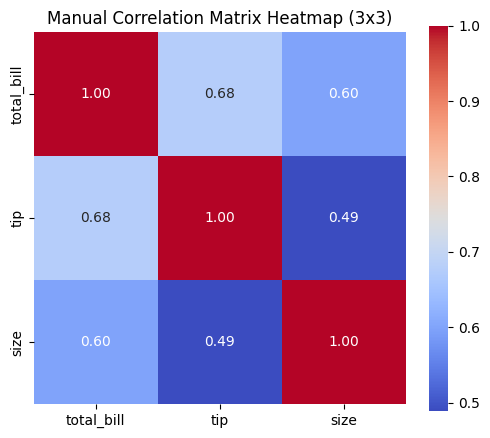

In [21]:
# Extract columns
x = Dataset_tips['total_bill']
y = Dataset_tips['tip']
z = Dataset_tips['size']

# Manually compute all 9 correlations
cor_matrix = [
    [correlation(x, x), correlation(x, y), correlation(x, z)],
    [correlation(y, x), correlation(y, y), correlation(y, z)],
    [correlation(z, x), correlation(z, y), correlation(z, z)]
]

import pandas as pd

labels = ['total_bill', 'tip', 'size']
cor_df = pd.DataFrame(cor_matrix, index=labels, columns=labels)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cor_df, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Manual Correlation Matrix Heatmap (3x3)")
plt.show()






### 📘 **Central Limit Theorem (CLT) – Super Short Notes**

---

### ✅ **Definition:**

When you take many **random samples** from any population and find their **averages**, those averages will form a **normal distribution** (bell curve), even if the original data is not normal.

---

### ✅ **Why We Use It:**

* Helps us work with **sample data**.
* Makes it easier to **predict population values**.
* Needed for **confidence intervals**, **z-tests**, etc.

---

### ✅ **CLT Formula:**

For a sampling distribution of the sample mean:

$$
\mu_{\bar{x}} = \mu
$$

$$
\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}
$$

Where:

* $\mu_{\bar{x}}$: Mean of sample means
* $\mu$: Population mean
* $\sigma_{\bar{x}}$: Standard deviation of sample means (Standard Error)
* $\sigma$: Population standard deviation
* $n$: Sample size

---

### ✅ **Key Points:**

* Sample size should be **n ≥ 30**
* The more samples, the more normal the shape

---

### ✅ **Without CLT:**

* Can’t use many stats tools correctly
* Predictions may be wrong



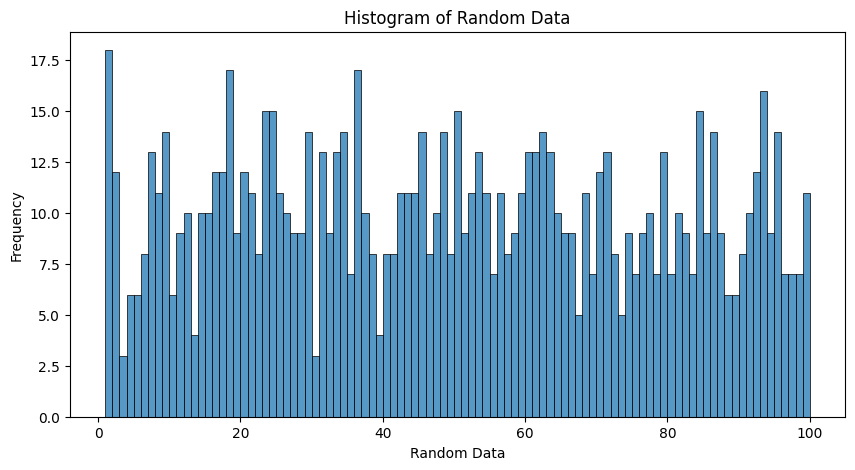

In [40]:
from h11 import Data
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

random_data=[np.random.randint(1,100) for i in range(1000)]
Dataset_random=pd.DataFrame(random_data,columns=["random"])
plt.figure(figsize=(10,5))
sns.histplot(Dataset_random,x="random",bins=[i for i in range(1,101)])
#sns.kdeplot(Dataset_random["random"],shade=True)
plt.title("Histogram of Random Data")
plt.xlabel("Random Data")
plt.ylabel("Frequency")
plt.show()


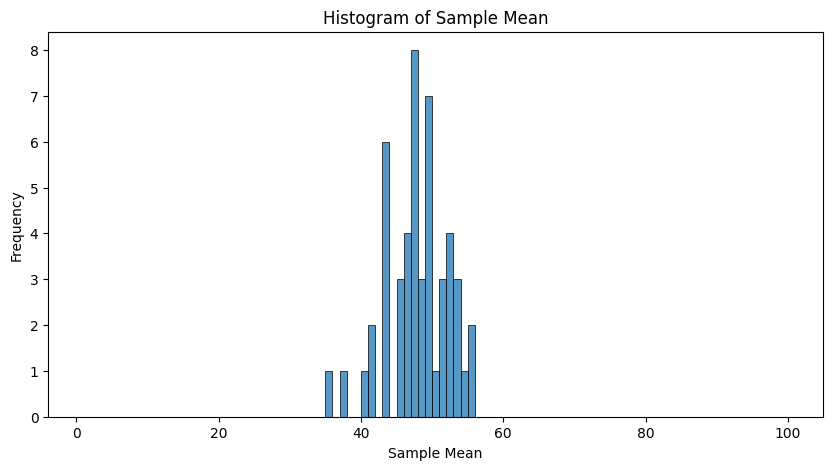

In [41]:
#get sample data 
Sample_mean=[]
for no_of_samples in range(50):
    sample_data=[]
    for i in range(50):
        sample_data.append(np.random.choice(Dataset_random["random"]))
    Sample_mean.append(np.mean(sample_data))
plt.figure(figsize=(10,5))
#sns.kdeplot(Sample_mean,shade=True)
sns.histplot(Sample_mean,bins=[i for i in range(1,101)])
plt.title("Histogram of Sample Mean")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()